# Are you experienced?

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Input NetCDF file info
file = home+'/Documents/ccrcproc/ACE/gfdl_nyf_1080/ocean.ncra166to170.nc'
variable = 'sea_level'

In [3]:
# Extract the variables
nc = Dataset(file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
lat = nc.variables['yu_ocean'][:]
potrho = nc.variables['potrho'][:]
ssh = nc.variables[variable][:]
mld = nc.variables['mld'][:]
ty_trans_rho = nc.variables['ty_trans_rho'][0,:,:,:]
nc.close() # close the file

IOError: No such file or directory

In [4]:
ssh.shape


(1, 1080, 1440)

In [5]:
geolon_t.shape

(1080, 1440)

In [6]:
mld.shape

(1, 1080, 1440)

## Plot SSH quick and dirty

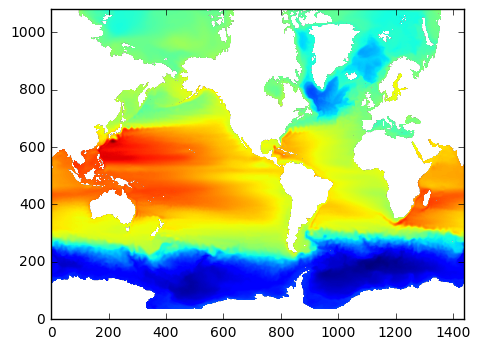

In [7]:
plt.imshow(ssh[0])
plt.gca().invert_yaxis()
plt.show()


## Plot SSH with contour overlays

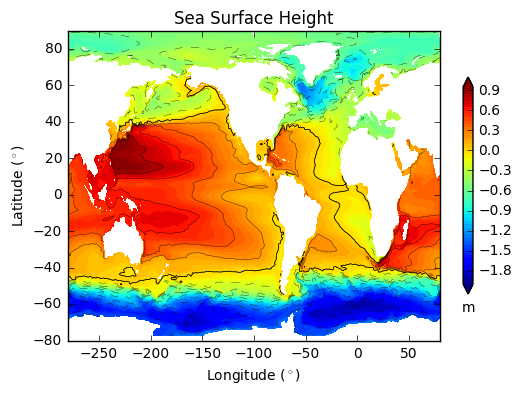

In [8]:
clev = np.arange(-2,1,0.05)
plt.contourf(geolon_t,geolat_t,ssh[0],levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
clev = np.arange(-2,1,0.2)
plt.contour(geolon_t,geolat_t,ssh[0],levels=clev,colors='k',linewidths=0.25)
plt.contour(geolon_t,geolat_t,ssh[0],levels=[0.0,],colors='k',linewidths=0.5)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('Sea Surface Height')

plt.show()
#plt.savefig('SSH.pdf')

## SSH with MLD overlay

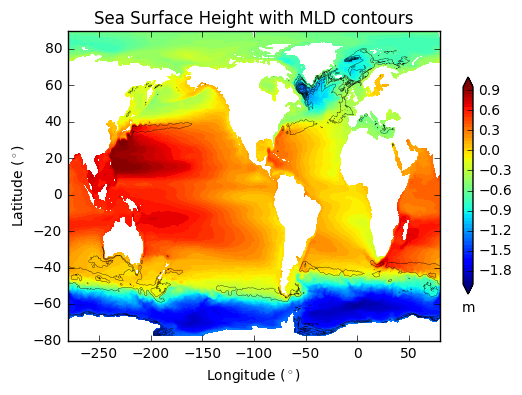

In [9]:
clev = np.arange(-2,1,0.05)
plt.contourf(geolon_t,geolat_t,ssh[0],levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
#plt.hold()
clev = np.arange(0,1000,100)
plt.contour(geolon_t,geolat_t,mld[0],levels=clev,colors='k',linewidths=0.25)
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('Sea Surface Height with MLD contours')

plt.show()
#plt.savefig('SSH.pdf')

In [10]:
clev = np.arange(0,1000,100)
clev[1]

100

In [11]:
clev.shape

(10,)

In [12]:
clev[:]

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## plot a zonal mean of SSH

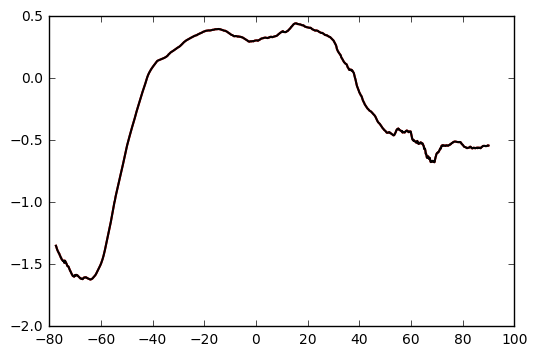

In [13]:
ssh_mabar = np.ma.mean(ssh,axis=2)[0,:]
ssh_bar = np.mean(ssh,axis=2)[0,:]

plt.plot(lat,ssh_mabar,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.plot(lat,ssh_bar,linestyle='-',color='k',linewidth=1.5,label='no mask')

plt.show()

## note that masked values are excluded in the mean

In [14]:
ssh_bar[:]

masked_array(data = [-- -- -- ..., -0.5394989101788078 -0.5402814779597649 -0.5411212951179565],
             mask = [ True  True  True ..., False False False],
       fill_value = 1e+20)

In [15]:
ssh_mabar[:]

masked_array(data = [-- -- -- ..., -0.5394989101788078 -0.5402814779597649 -0.5411212951179565],
             mask = [ True  True  True ..., False False False],
       fill_value = 1e+20)

## Plot the MOC from ty_trans

In [16]:
ty_trans_rho.shape

(80, 1080, 1440)

In [17]:
psi = np.ma.sum(np.ma.cumsum(ty_trans_rho,axis=0),axis=2)

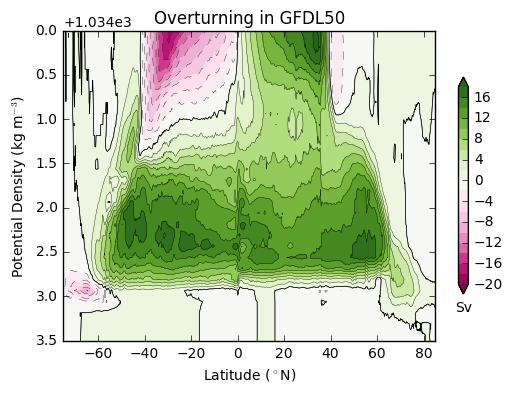

In [18]:
#plt.subplot(311)
clev = np.arange(-20,20,2)
plt.contourf(lat,potrho,psi,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,psi,levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,psi,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Overturning in GFDL50')


In [ ]:
obs_file ='/g/data1/v45/pas561/mom/archive/WOA/woa13_decav_t00_04v2.nc'

# Extract the variables
nc = Dataset(obs_file, mode='r') # file handle, open in read only mode
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
zt = nc.variables['depth'][:]
t_an = nc.variables['t_an'][:]
#mld = nc.variables['mld'][:]
#ty_trans_rho = nc.variables['ty_trans_rho'][0,:,:,:]
nc.close() # close the file
print t_an.shape

plt.subplot(1,2,1)
plt.imshow(t_an[0,0,:,:])
plt.gca().invert_yaxis()
plt.show()


#re-arrange lon values (-180:180) to match xt_ocean (-280:80)
# Note, you need to check that longitude values match for source and target grids and that they are in increasing order (example for changing CORE longitude values):
# adjust longitude values:
lon[lon>80] -= 360
lon_copy = np.ma.copy(lon)
shift_index0 = np.argmin(lon)
shift_index1 = len(lon) - shift_index0
lon[:shift_index1] = lon_copy[shift_index0:]
lon[shift_index1:] = lon_copy[:shift_index0]

t_an_copy = np.ma.copy(t_an)
t_an[:,:,:,:shift_index1] = t_an_copy[:,:,:,shift_index0:]
t_an[:,:,:,shift_index1:] = t_an_copy[:,:,:,:shift_index0]
#t_an_c = np.ma.masked_invalid(t_an)

print t_an.shape

plt.subplot(1,2,2)
plt.imshow(t_an[0,0,:,:])
plt.gca().invert_yaxis()
plt.show()



In [ ]:
obs_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(obs_file, mode='r') # file handle, open in read only mode
lon = nc.variables['geolon_t'][:]
lat = nc.variables['geolat_t'][:]
xt = nc.variables['xt_ocean'][:]
yt = nc.variables['yt_ocean'][:]
zt = nc.variables['st_ocean'][:]
temp = nc.variables['temp'][:]
#mld = nc.variables['mld'][:]
#ty_trans_rho = nc.variables['ty_trans_rho'][0,:,:,:]
nc.close() # close the file
print temp.shape


In [ ]:
sst=temp[0,0,:,:]
print sst.shape
print xt.shape
print xt_ocean.shape
import scipy.interpolate
#note meshgrid fails due to memory error with geolon_t and geolat_t
#xt_2d,yt_2d = np.meshgrid(xt_ocean,yt_ocean)
#amps_u_interp = scipy.interpolate.griddata((lon.flatten(),lat.flatten()),sst.flatten(),(xt_2d,yt_2d),method='linear')
amps_u_interp = scipy.interpolate.griddata((lon.flatten(),lat.flatten()),sst.flatten(),(geolon_t,geolat_t),method='linear')
# I found I needed this to mask a bunch of NaNs after:
amps_u_interp = np.ma.masked_invalid(amps_u_interp)
print amps_u_interp.shape

plt.subplot(2,2,1)
clev = np.arange(-2,34,1)
plt.contourf(geolon_t,geolat_t,amps_u_interp,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('($^\circ$C)')
plt.xlabel('Longitude ($^\circ$W)')
plt.ylabel('Latitude ($^\circ$N)')
plt.title('MOM025 Temp on MOM01 Grid')

In [ ]:
#zonal average is wrong in Arctic due to tripolar grid
zavgt=np.ma.mean(temp[0,:,:,:],axis=2)
print zavgt.shape
print zt.shape
print st75_ocean.shape

########## for 1D lat/long coords, can change degree of kx for improved fit if needed:
from scipy.interpolate import RectBivariateSpline
f = RectBivariateSpline(zt,yt,zavgt,kx=1,ky=1)
var_interp = f(st75_ocean,yt_ocean)
# I found I needed this to mask a bunch of NaNs after:
var_interp  = np.ma.masked_invalid(var_interp)
print var_interp.shape

plt.subplot(2,2,1)
clev = np.arange(-2,34,1)
plt.contourf(yt_ocean,st75_ocean,var_interp,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('($^\circ$C)')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.title('MOM025 Temp on MOM01 Grid')
 